In [7]:
# Standard Python modules
import os, sys
import yaml
from pathlib import Path
import numpy as np
import pandas as pd
import xarray as xr
# matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib import rcParams
from matplotlib.colors import ListedColormap
# plot styles/formatting
import seaborn as sns
import cmocean.cm as cmo
import cmocean
# cartopy
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes

# Path to modules
sys.path.append('../modules')
# Import my modules
from teleconnections import AO_index
from plotter import draw_basemap

In [8]:
# Set up paths

path_to_data = '/home/nash/DATA/data/'                            # project data -- read only
path_to_out  = '/home/nash/DATA/repositories/AR_types/out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '/home/nash/DATA/repositories/AR_types/figs/'      # figures

In [9]:
yaml_doc = '../data/config.yml'

config = yaml.load(open(yaml_doc), Loader=yaml.SafeLoader)
# djf_dict mam_dict djfmam_dict
ssn = 'mam'
ar_dict = config[ssn]

In [10]:
## AO Index
ref = 'daily'
df = AO_index(ref, path_to_data)

# Trim date range
if ssn == 'djf':
    idx = (df.index >= ar_dict['start_date']) & (df.index <= '2018-03-01')
if ssn == 'mam':
    idx = (df.index >= ar_dict['start_date']) & (df.index <= '2018-06-01')

df = df.loc[idx]
        
# # Select months
# if ar_dict['mon_s'] > ar_dict['mon_e']:
#     idx = (df.MON >= ar_dict['mon_s']) | (df.MON <= ar_dict['mon_e'])
# else:
#     idx = (df.MON >= ar_dict['mon_s']) & (df.MON <= ar_dict['mon_e'])

# df = df.loc[idx]
df
# ## resamples data to quarterly
# df_ao = df.ANOM.resample('QS-DEC').mean()
# df_ao = df_ao.dropna()
# df_ao

,YEAR,MON,DAY,ANOM,COND,AO
date,,,,,,
1979-03-01 09:00:00,1979,3,1,0.372,POSITIVE,1
1979-03-02 09:00:00,1979,3,2,0.737,POSITIVE,1
1979-03-03 09:00:00,1979,3,3,1.127,POSITIVE,1
1979-03-04 09:00:00,1979,3,4,1.264,POSITIVE,1
1979-03-05 09:00:00,1979,3,5,1.414,POSITIVE,1
...,...,...,...,...,...,...
2018-05-27 09:00:00,2018,5,27,0.861,POSITIVE,1
2018-05-28 09:00:00,2018,5,28,1.036,POSITIVE,1
2018-05-29 09:00:00,2018,5,29,0.665,POSITIVE,1


In [11]:
# Select lat/lon grid
lonmin = 45
lonmax = 110
latmin = 0
latmax = 50

ar_filename = path_to_data + 'ar_catalog/globalARcatalog_ERA-Interim_1979-2019_v3.0.nc'
ds = xr.open_dataset(ar_filename)
ds = ds.sel(lat=slice(latmin, latmax), lon=slice(lonmin, lonmax))

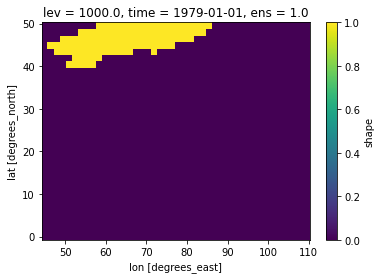

In [12]:
shape = ds.shape.squeeze()
# where shape is greater than 0, set those values to 1 and the rest to 0
nmap = xr.where((shape > 0), 1, 0)
nmap.isel(time=0).plot()

In [13]:
## calculate annual climatology and subtract
ds = nmap.groupby('time.dayofyear') - nmap.groupby('time.dayofyear').mean('time')

idx = slice(ar_dict['start_date'], ar_dict['end_date'])
ds = ds.sel(time=idx)
ds

<xarray.DataArray 'shape' (time: 57348, lat: 34, lon: 44)>
array([[[ 0.        ,  0.        ,  0.        , ..., -0.00609756,
         -0.01219512, -0.01219512],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.05487805, -0.06707317, -0.07926829, ...,  0.        ,
          0.        ,  0.        ],
        [-0.05487805, -0.08536585, -0.08536585, ...,  0.        ,
          0.        ,  0.        ],
        [-0.05487805, -0.07317073, -0.08536585, ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ..., -0.00609756,
         -0.01219512, -0.01219512],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.05487805, -0.06707317, -0.07926829, ...,  0.        ,
          0.        ,  0.        ],
        [-0.05487805, -0.08536585, -0.08536585, ...,  0.        ,
          0.        ,  0.        ],
        [-0.05487805, -0.07317073, -0.08536585, ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ..., -0.00609756,
         -0.01219512, -0.01219512],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.05487805, -0.06707317, -0.07926829, ...,  0.        ,
          0.        ,  0.        ],
        [-0.05487805, -0.08536585, -0.08536585, ...,  0.        ,
          0.        ,  0.        ],
        [-0.05487805, -0.07317073, -0.08536585, ...,  0.        ,
          0.        ,  0.        ]],

       ...,

       [[ 0.        ,  0.        ,  0.        , ..., -0.00609756,
         -0.00609756, -0.01219512],
        [ 0.        ,  0.        ,  0.        , ..., -0.02439024,
         -0.02439024, -0.02439024],
        [ 0.        ,  0.        ,  0.        , ..., -0.02439024,
         -0.02439024, -0.02439024],
        ...,
        [-0.07317073, -0.05487805, -0.04268293, ..., -0.07317073,
         -0.06097561, -0.04268293],
        [-0.06707317, -0.07926829, -0.06707317, ..., -0.06707317,
         -0.05487805, -0.0304878 ],
        [ 0.92073171,  0.91463415,  0.91463415, ..., -0.06097561,
         -0.05487805, -0.04268293]],

       [[ 0.        ,  0.        ,  0.        , ..., -0.00609756,
         -0.00609756, -0.01219512],
        [ 0.        ,  0.        ,  0.        , ..., -0.02439024,
         -0.02439024, -0.02439024],
        [ 0.        ,  0.        ,  0.        , ..., -0.02439024,
         -0.02439024, -0.02439024],
        ...,
        [-0.07317073, -0.05487805, -0.04268293, ..., -0.07317073,
         -0.06097561, -0.04268293],
        [-0.06707317,  0.92073171,  0.93292683, ..., -0.06707317,
         -0.05487805, -0.0304878 ],
        [ 0.92073171,  0.91463415,  0.91463415, ..., -0.06097561,
         -0.05487805, -0.04268293]],

       [[ 0.        ,  0.        ,  0.        , ..., -0.00609756,
         -0.00609756, -0.01219512],
        [ 0.        ,  0.        ,  0.        , ..., -0.02439024,
         -0.02439024, -0.02439024],
        [ 0.        ,  0.        ,  0.        , ..., -0.02439024,
         -0.02439024, -0.02439024],
        ...,
        [-0.07317073, -0.05487805, -0.04268293, ..., -0.07317073,
         -0.06097561, -0.04268293],
        [-0.06707317,  0.92073171,  0.93292683, ..., -0.06707317,
         -0.05487805, -0.0304878 ],
        [-0.07926829,  0.91463415,  0.91463415, ..., -0.06097561,
         -0.05487805, -0.04268293]]])
Coordinates:
    lev        float64 1e+03
    ens        float64 1.0
  * lon        (lon) float64 45.0 46.5 48.0 49.5 ... 105.0 106.5 108.0 109.5
  * lat        (lat)

In [14]:
## resample to daily
ds = ds.resample(time='1D').mean()
ds

<xarray.DataArray 'shape' (time: 14337, lat: 34, lon: 44)>
array([[[ 0.        ,  0.        ,  0.        , ..., -0.00609756,
         -0.01219512, -0.01219512],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.05487805, -0.06707317, -0.07926829, ...,  0.        ,
          0.        ,  0.        ],
        [-0.05487805, -0.08536585, -0.08536585, ...,  0.        ,
          0.        ,  0.        ],
        [-0.05487805, -0.07317073, -0.08536585, ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ..., -0.01829268,
         -0.01219512, -0.01219512],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.04878049, -0.04878049, -0.0304878 , ...,  0.        ,
          0.        ,  0.        ],
        [-0.0304878 , -0.04268293, -0.06097561, ...,  0.        ,
          0.        ,  0.        ],
        [-0.03658537, -0.04268293, -0.03658537, ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ..., -0.03658537,
         -0.04268293, -0.0304878 ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.01829268, -0.02439024, -0.02439024, ...,  0.        ,
          0.        ,  0.        ],
        [-0.04268293, -0.03658537, -0.04878049, ...,  0.        ,
          0.        ,  0.        ],
        [-0.05487805, -0.04878049, -0.0304878 , ...,  0.        ,
          0.        , -0.00609756]],

       ...,

       [[-0.00609756, -0.00609756,  0.        , ..., -0.01219512,
         -0.0304878 , -0.02439024],
        [-0.00609756, -0.00609756, -0.00609756, ..., -0.03658537,
         -0.06707317, -0.07317073],
        [-0.00609756, -0.00609756, -0.00609756, ..., -0.04878049,
         -0.07317073, -0.07317073],
        ...,
        [-0.11585366, -0.12195122, -0.07926829, ..., -0.01219512,
         -0.01829268, -0.01829268],
        [-0.09756098, -0.11585366, -0.09756098, ..., -0.01829268,
         -0.01829268, -0.01829268],
        [-0.09756098, -0.10365854, -0.09146341, ..., -0.01829268,
         -0.03658537, -0.03658537]],

       [[ 0.        ,  0.        ,  0.        , ..., -0.02439024,
         -0.0304878 , -0.01829268],
        [ 0.        ,  0.        , -0.00609756, ..., -0.03658537,
         -0.04878049, -0.04878049],
        [ 0.        ,  0.        ,  0.        , ..., -0.04268293,
         -0.03658537, -0.04878049],
        ...,
        [-0.04268293, -0.02439024, -0.01829268, ..., -0.00609756,
         -0.00609756, -0.01829268],
        [-0.04878049, -0.0304878 , -0.03658537, ..., -0.00609756,
         -0.00609756, -0.01219512],
        [-0.02439024, -0.02439024, -0.01829268, ..., -0.00609756,
         -0.01219512, -0.0304878 ]],

       [[ 0.        ,  0.        ,  0.        , ..., -0.00609756,
         -0.00609756, -0.01219512],
        [ 0.        ,  0.        ,  0.        , ..., -0.02439024,
         -0.02439024, -0.02439024],
        [ 0.        ,  0.        ,  0.        , ..., -0.02439024,
         -0.02439024, -0.02439024],
        ...,
        [-0.07317073, -0.05487805, -0.04268293, ..., -0.07317073,
         -0.06097561, -0.04268293],
        [-0.06707317,  0.42073171,  0.43292683, ..., -0.06707317,
         -0.05487805, -0.0304878 ],
        [ 0.42073171,  0.66463415,  0.91463415, ..., -0.06097561,
         -0.05487805, -0.04268293]]])
Coordinates:
  * time     (time) datetime64[ns] 1979-03-01 1979-03-02 ... 2018-05-31
    lev      float64 1e+03
    ens      float64 1.0
  * lon      (lon) float64 45

In [15]:
# Add AO time series to ds; set as coordinate variables
ds = ds.to_dataset()
ds['ao'] = ('time', df.AO)
ds = ds.set_coords('ao')

In [16]:
# Select months
if ar_dict['mon_s'] > ar_dict['mon_e']:
    idx = (ds.time.dt.month >= ar_dict['mon_s']) | (ds.time.dt.month <= ar_dict['mon_e'])
else:
    idx = (ds.time.dt.month >= ar_dict['mon_s']) & (ds.time.dt.month <= ar_dict['mon_e'])

ds = ds.sel(time=idx)

In [17]:
ds

<xarray.Dataset>
Dimensions:  (lat: 34, lon: 44, time: 3680)
Coordinates:
  * time     (time) datetime64[ns] 1979-03-01 1979-03-02 ... 2018-05-31
    lev      float64 1e+03
    ens      float64 1.0
  * lon      (lon) float64 45.0 46.5 48.0 49.5 51.0 ... 105.0 106.5 108.0 109.5
  * lat      (lat) float64 0.0 1.5 3.0 4.5 6.0 7.5 ... 43.5 45.0 46.5 48.0 49.5
    ao       (time) int64 1 1 1 1 1 1 1 1 1 -1 -1 -1 ... 1 1 1 1 1 1 1 1 1 1 1 1
Data variables:
    shape    (time, lat, lon) float64 0.0 0.0 0.0 ... -0.06098 -0.05488 -0.04268

In [18]:
# Compute composites of AO phase
comp_AO = ds.groupby('ao').mean('time')

In [19]:
# Set seaborn plot style
sns.set()
sns.set_style("ticks", {'patch.force_edgecolor':False})

# Set projections
datacrs = ccrs.PlateCarree()   # data/source
mapcrs = ccrs.PlateCarree()    # map/destination

# Set tick/grid locations
dx = np.arange(lonmin,lonmax+20,20)
dy = np.arange(latmin,latmax+20,20)

# Labels
plt_labels = ['AO Negative', 'AO Positive']

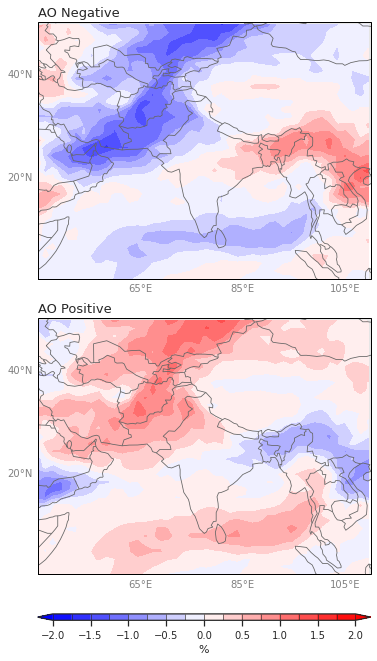

In [20]:
# Create figure
fig = plt.figure(figsize=(10,11))
nrows = 2
ncols = 1

# Set up Axes Grid
axes_class = (GeoAxes,dict(map_projection=mapcrs))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(nrows, ncols), axes_pad = 0.55,
                cbar_location='bottom', cbar_mode='single',
                cbar_pad=0.0, cbar_size='2.5%',label_mode='',
                direction='column')

# loop to draw plots
aotype_lst = [-1, 1]
for k, (ax, ao_type) in enumerate(zip(axgr, aotype_lst)):
    data = comp_AO.sel(ao=ao_type)
    # lat/lon arrays
    lats = data.lat.values
    lons = data.lon.values 
    ax = draw_basemap(ax, extent=[lonmin,lonmax,latmin,latmax], xticks=dx, yticks=dy)
    
    # filled contour
    ar = data.shape.values*100
    clevs = np.arange(-2, 2.25, 0.25)
    cf = ax.contourf(lons, lats, ar, transform=datacrs,
                    levels=clevs,cmap='bwr', extend='both')
    
   # subtitles
    ax.set_title(plt_labels[k], loc='left',fontsize=13)

    
# Colorbar (single)
cb = fig.colorbar(cf, axgr.cbar_axes[0], orientation='horizontal', drawedges=True)
cb.set_label('%', fontsize=11)
cb.ax.tick_params(labelsize=10)
    
# Save figure
filepath = path_to_figs + ssn + '_AO_ARfreq_composite.png'
plt.savefig(filepath, dpi=150, bbox_inches='tight')

# Show
plt.show()
    